### Loan Approval Prediction
Dataset downloaded from the hackathon organised by Analytics Vidhya https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#ProblemStatement

### Problem Statement
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers

### Hypothesis Generation
Education - Applicants with higher education level i.e. graduate level should have higher chances of loan approval

Income: Applicants with higher income should have more chances of loan approval

Loan amount: If the loan amount is less, the chances of loan approval should be high

Loan term: Loans with shorter time period should have higher chances of approval

Previous credit history: Applicants who have repayed their previous debts should have higher chances of loan approval

Monthly installment amount: If the monthly installment amount is low, the chances of loan approval should be high

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import missingno as ms

In [2]:
#loading train dataset 
train_original=pd.read_csv(r"C:\Users\Ravi\Documents\Loan\train_bank.csv")

In [3]:
#copying original data set to train_data for analysis and data cleaning
train_data=train_original.copy()

In [4]:
#loading test dataset
test_data=pd.read_csv(r"C:\Users\Ravi\Documents\Loan\test_bank.csv")

In [5]:
#first five value of train dataset using head function
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#first five values of test dataset
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
#shape of test and train dataset
print("train_data {} ".format(train_data.shape))
print("test_data {} ".format(test_data.shape))

train_data (614, 13) 
test_data (367, 12) 


In [8]:
#checking null values of train dataset
train_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#checking null values of test dataset
test_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [10]:
#calculating %of missing values in train dataset 
def missing_value(data1,data2,col_name="missing_value"):
    missing_df1=pd.DataFrame(train_data.isna().sum()/len(train_data)*100,columns=[col_name])
    missing_df2=pd.DataFrame(test_data.isna().sum()/len(test_data)*100,columns=[col_name])
    
    missing=pd.DataFrame({"train":missing_df1.iloc[:,0],"test":missing_df2.iloc[:,0]})
    return missing

In [12]:
missing_value(train_data,test_data)

,train,test
ApplicantIncome,0.000000,0.000000
CoapplicantIncome,0.000000,0.000000
Credit_History,8.143322,7.901907
Dependents,2.442997,2.724796
Education,0.000000,0.000000
Gender,2.117264,2.997275
LoanAmount,3.583062,1.362398
Loan_Amount_Term,2.280130,1.634877
Loan_ID,0.000000,0.000000
Loan_Status,0.000000,NaN


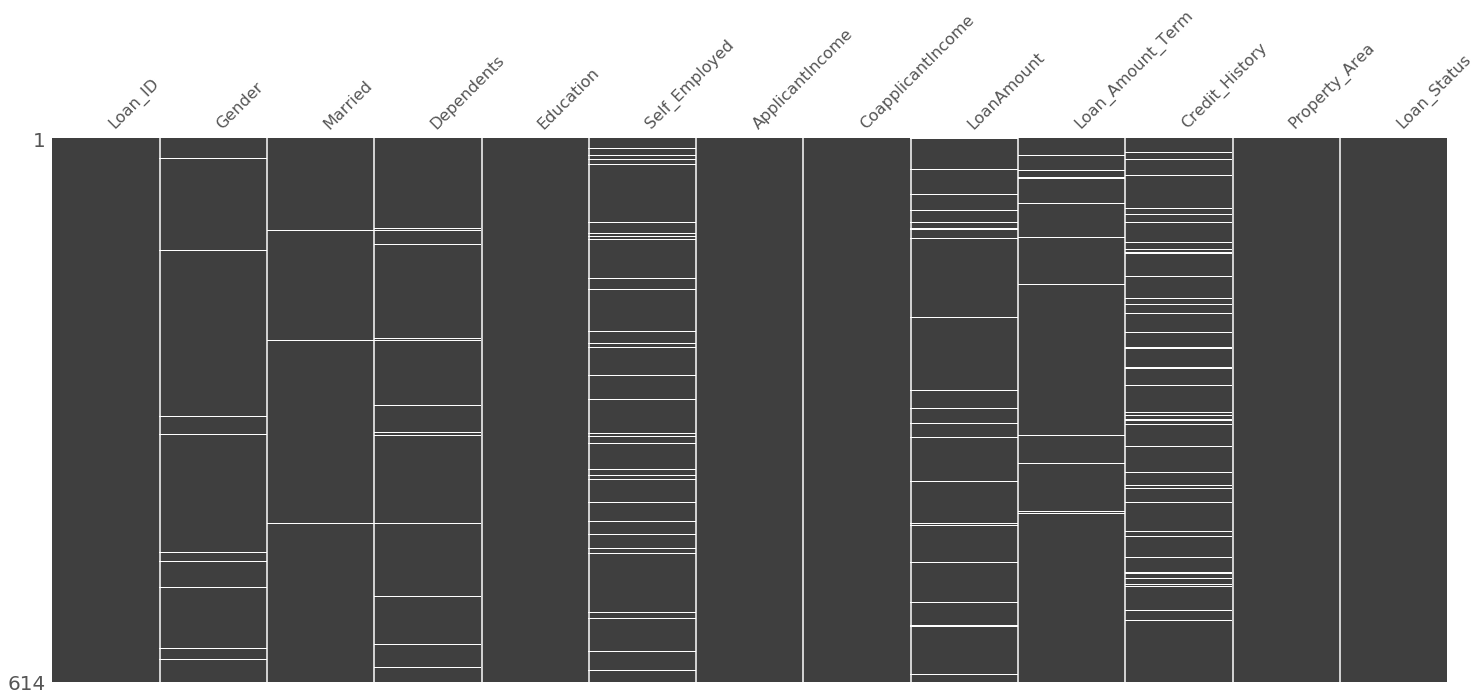

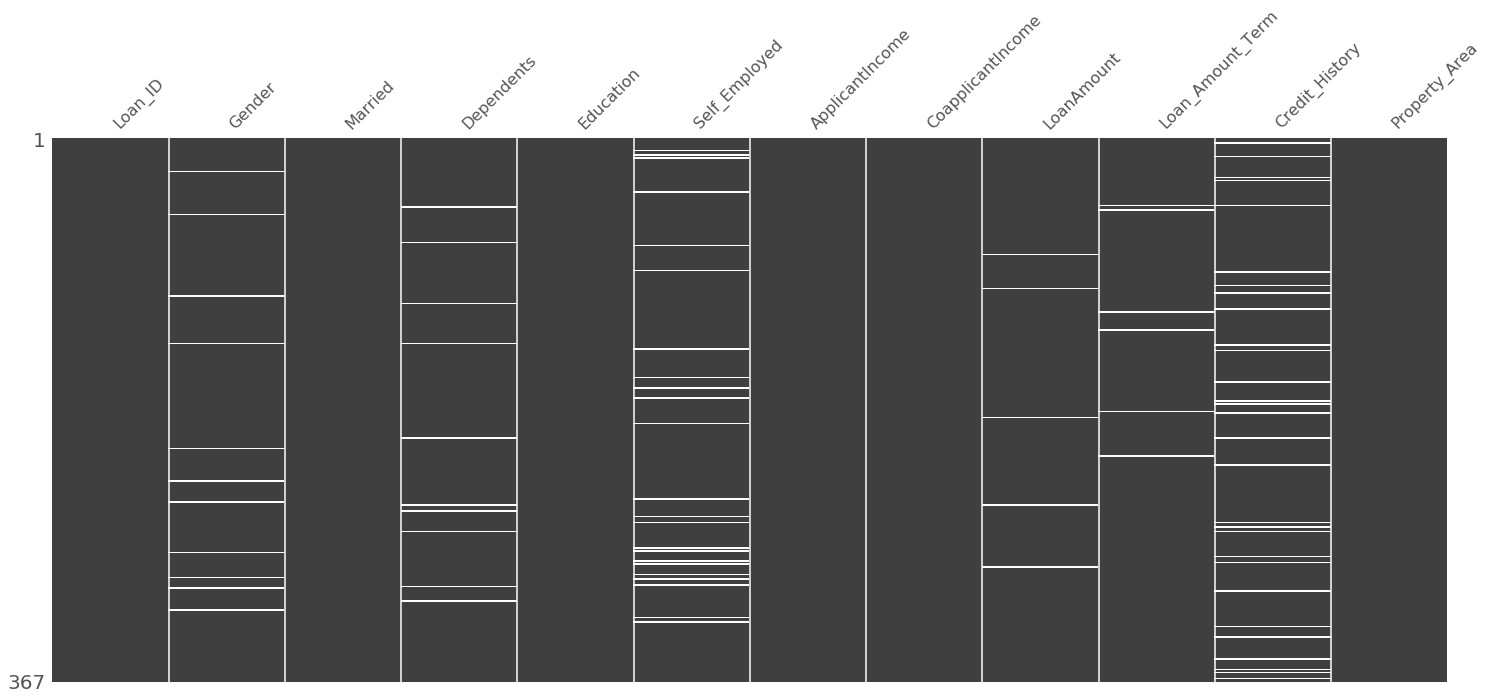

In [13]:
#plotting missing values of train_dataset and test_dataset using missingno library 
ms.matrix(train_data,sparkline=False)
ms.matrix(test_data,sparkline=False)

In [14]:
# exploring the data types of train and test datsets
#train dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [15]:
#test dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


#### Note:   there are three types of data
        ~Object
        ~integer
        ~float

In [16]:
#finding continuous varibles in train_dataset
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [17]:
#continuous variables in test_dataset
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [18]:
#categorical variables in train_dataset
train_data.describe(include="O")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002874,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [19]:
#categorical variables in test_dataset
test_data.describe(include="O")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,367,356,367,357,367,344,367
unique,367,2,2,4,2,2,3
top,LP002759,Male,Yes,0,Graduate,No,Urban
freq,1,286,233,200,283,307,140


# Categorical Variables

In [20]:
unique_cols_test = ["Gender","Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"]

In [21]:
#printing unique values of categorical values in train dataset
for i in unique_cols_test:
    print(i,"distinct_values:")
    print(train_data[i].unique())
    print("")
    print("-"*30)

Gender distinct_values:
['Male' 'Female' nan]

------------------------------
Married distinct_values:
['No' 'Yes' nan]

------------------------------
Dependents distinct_values:
['0' '1' '2' '3+' nan]

------------------------------
Education distinct_values:
['Graduate' 'Not Graduate']

------------------------------
Self_Employed distinct_values:
['No' 'Yes' nan]

------------------------------
Property_Area distinct_values:
['Urban' 'Rural' 'Semiurban']

------------------------------
Loan_Status distinct_values:
['Y' 'N']

------------------------------


In [22]:
unique_cols = ["Gender","Married","Dependents","Education","Self_Employed","Property_Area"]

In [23]:
#categorical values in test dataset
for i in unique_cols:
    print(i,"distinct_values:")
    print(test_data[i].unique())
    print("")
    print("-"*30)

Gender distinct_values:
['Male' 'Female' nan]

------------------------------
Married distinct_values:
['Yes' 'No']

------------------------------
Dependents distinct_values:
['0' '1' '2' '3+' nan]

------------------------------
Education distinct_values:
['Graduate' 'Not Graduate']

------------------------------
Self_Employed distinct_values:
['No' 'Yes' nan]

------------------------------
Property_Area distinct_values:
['Urban' 'Semiurban' 'Rural']

------------------------------


# Dependent/Target Variable

In [24]:
#exploring target variable 
train_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


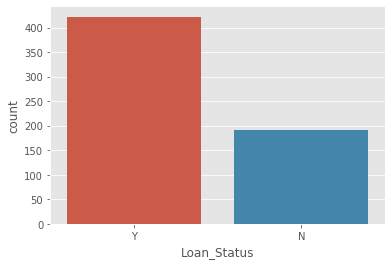

In [25]:
# value count of Loan_Status for checking balance of train_dataset
print(train_data['Loan_Status'].value_counts(normalize=True))
sns.countplot(train_data['Loan_Status'])
plt.show()

# Independent Variable

In [26]:
train_data.describe(include="O")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002874,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [27]:
#plotting ordinal variables 
def cat_var(col_name):
    print(train_data[col_name].value_counts())
    print(train_data[col_name].value_counts(normalize=True))
    sns.countplot(train_data[col_name],palette="OrRd")
    plt.show()

### Ordinal Variables

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64


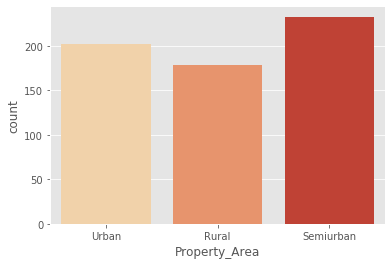

In [28]:
cat_var("Property_Area")

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64


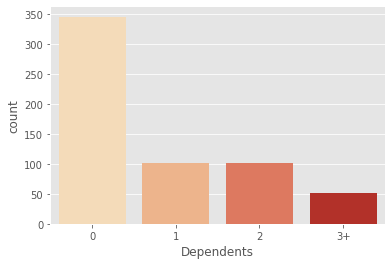

In [29]:
cat_var("Dependents")

### Cardinal Variables

Yes    398
No     213
Name: Married, dtype: int64
Yes    0.651391
No     0.348609
Name: Married, dtype: float64


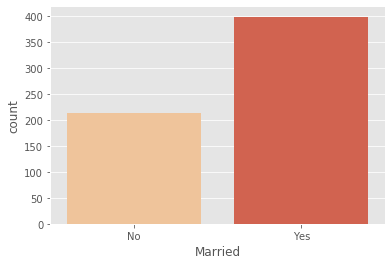

In [30]:
cat_var("Married")

Male      489
Female    112
Name: Gender, dtype: int64
Male      0.813644
Female    0.186356
Name: Gender, dtype: float64


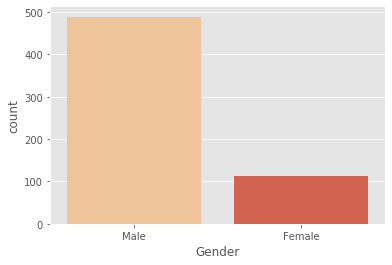

In [31]:
cat_var("Gender")

Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64


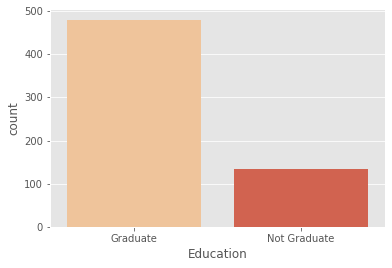

In [32]:
cat_var("Education")

No     500
Yes     82
Name: Self_Employed, dtype: int64
No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64


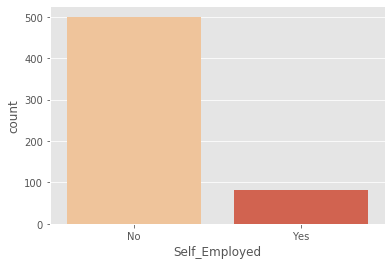

In [33]:
cat_var("Self_Employed")

So from the above plot and value count analysis it can be says that

81% applicant are male in dataset

65% appliant are married in dataset

15% applicants are self employed.

85% applicants have credit history.

80% applicants are Graduate.

# Numerical Variable

In [34]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [35]:
#plotting numericals for exploring
def num_var(col_name):
    fig=plt.figure(figsize=(16,5))
    ax =fig.add_subplot
    plt.subplot(121)
    sns.distplot(train_data[col_name],color="m")
    plt.subplot(122)
    sns.boxplot(train_data[col_name])

    plt.show()

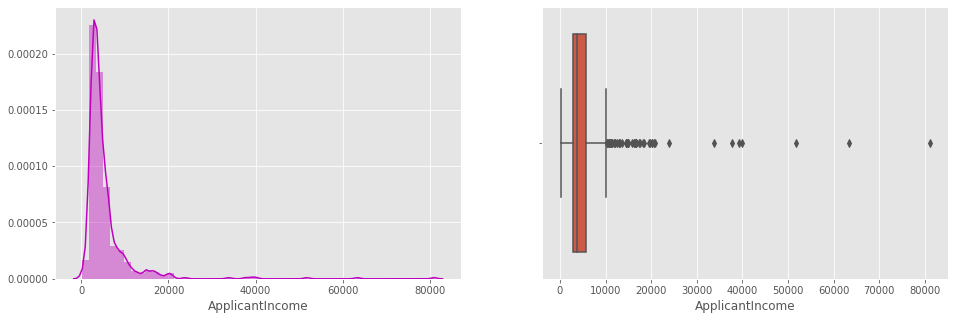

In [36]:
num_var("ApplicantIncome")

##### From Above it can be observe applicant income is towards left which means it is not normally distributed. Right skewed distribution. and from boxplot it can be observe that there is lot of outliers

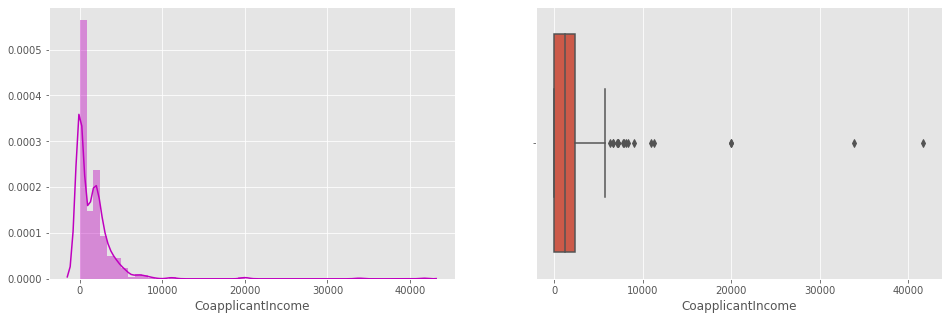

In [37]:
num_var("CoapplicantIncome")

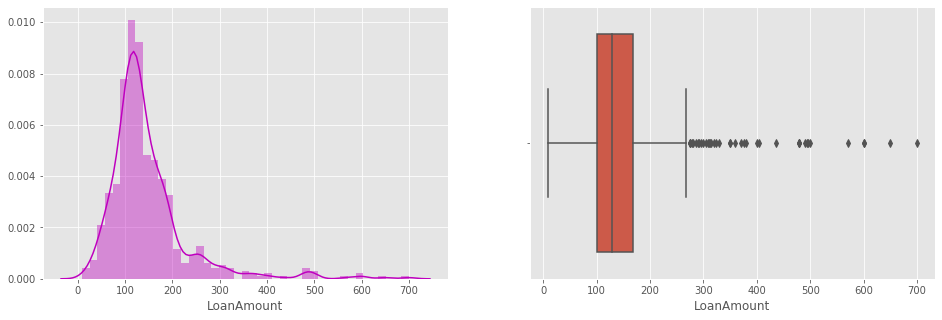

In [38]:
num_var("LoanAmount")

### Loan_amount_terms

In [39]:
train_data["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

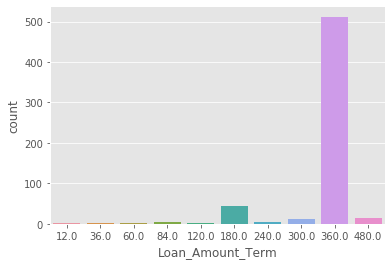

In [40]:
sns.countplot(train_data["Loan_Amount_Term"])
plt.show()

In [41]:
train_data["Loan_Amount_Term"].value_counts(normalize=True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

#### Around 85% Loan term is of 360 month

# Independent vs Dependent variables

## Bivariate Analysis

### categorical variables vs Loan_Status

In [42]:
#comparing other independent variables with dependent variables
def var(column_name):
    print(pd.crosstab(train_data[column_name],train_data['Loan_Status']))
    sns.countplot(train_data[column_name],hue="Loan_Status",data=train_data,palette="ocean_r").set_title(column_name)
    plt.show()

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


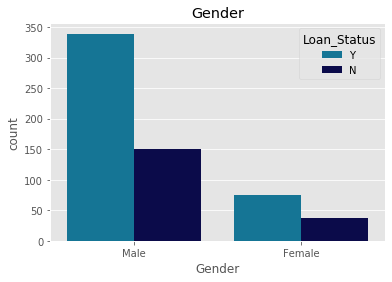

In [43]:
#gender vs loan_status 
var("Gender")

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


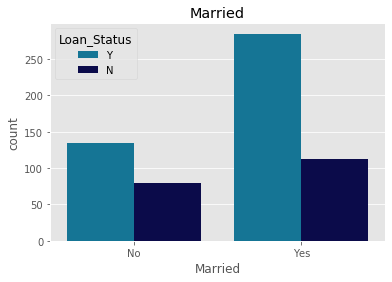

In [44]:
var("Married")

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


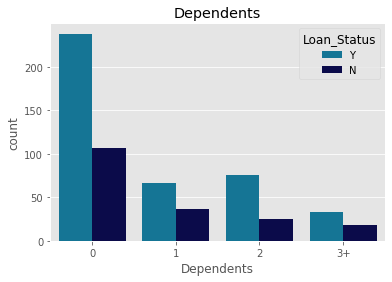

In [45]:
var("Dependents")

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


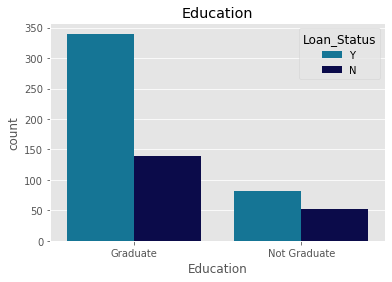

In [46]:
var("Education")

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


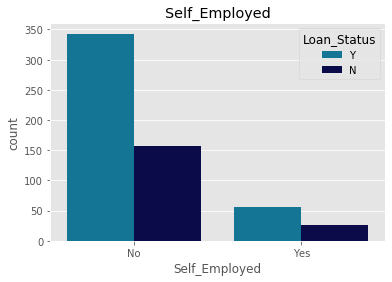

In [47]:
var("Self_Employed")

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


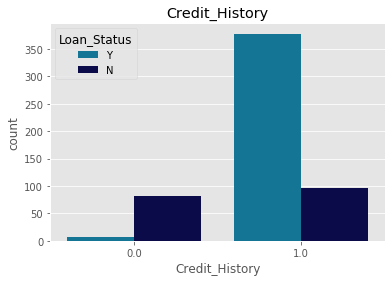

In [48]:
var("Credit_History")

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


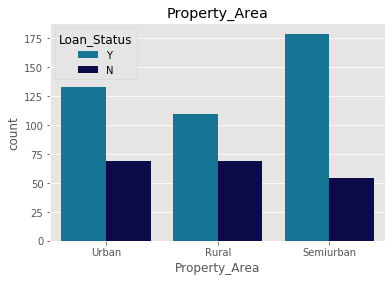

In [49]:
var("Property_Area")

### From the above chart, it can be says that:

proportion of male and female applicants is more or less same for both approved and unapproved loans

proportion of married applicants is higher for the approved loans

distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status

there is nothing significant we can infer from Self_Employed vs Loan_Status plot.

proportion of loans getting approved for graduates is higher compared to non-graduates

it seems people with credit history as 1 are more likely to get their loans approved

proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

# Numerical data vs Target variable

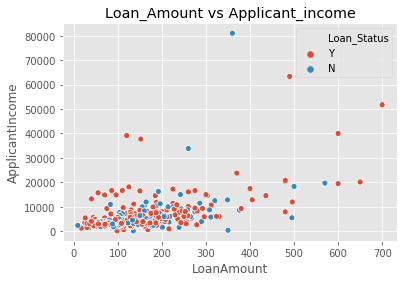

In [50]:
sns.scatterplot(x="LoanAmount",y='ApplicantIncome',data=train_data,hue="Loan_Status").set_title("Loan_Amount vs Applicant_income")
plt.show()

In [51]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


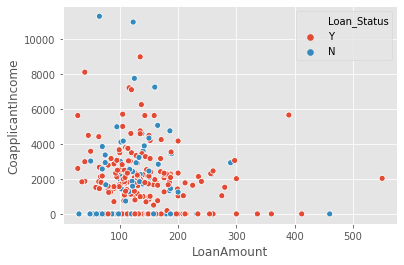

In [52]:
sns.scatterplot(test_data["LoanAmount"],train_data["CoapplicantIncome"],hue="Loan_Status",data=train_data)

# Mapping all the categorical values

In [53]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [54]:
train_data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [55]:
train_data['Gender']=train_data['Gender'].map({"Male":1,"Female":0})

In [56]:
train_data['Married']=train_data["Married"].map({"Yes":1,"No":0})

In [57]:
train_data['Dependents'] = train_data['Dependents'].map({"0":0,"1":1,"2":2,"3+":4})

In [58]:
train_data['Education']=train_data["Education"].map({"Graduate":1,"Not Graduate":0})

In [59]:
train_data["Self_Employed"]=train_data["Self_Employed"].map({"Yes":1,"No":0})

In [60]:
train_data["Property_Area"]=train_data["Property_Area"].map({"Urban":1,"Semiurban":2,"Rural":3})

In [61]:
train_data["Loan_Status"]=train_data["Loan_Status"].map({"Y":1,"N":0})

In [62]:
train_data["Loan_Status"]

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

### Corelation_Matrix

In [63]:
train_data.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.369612,0.168347,-0.049258,-0.009829,0.053989,0.083946,0.106947,-0.075117,0.016337,0.024556,0.019857
Married,0.369612,1.000000,0.316592,-0.014223,0.001909,0.051332,0.077770,0.149519,-0.103810,0.004381,-0.002918,0.089280
Dependents,0.168347,0.316592,1.000000,-0.062254,0.048433,0.134625,0.031882,0.171972,-0.101388,-0.056637,0.005676,-0.000760
Education,-0.049258,-0.014223,-0.062254,1.000000,0.012333,0.140760,0.062290,0.171133,0.078784,0.081822,-0.065243,0.085884
Self_Employed,-0.009829,0.001909,0.048433,0.012333,1.000000,0.140826,-0.011152,0.123931,-0.037069,0.003883,0.031214,-0.002303
ApplicantIncome,0.053989,0.051332,0.134625,0.140760,0.140826,1.000000,-0.116605,0.570909,-0.045306,-0.014715,0.009500,-0.004710
CoapplicantIncome,0.083946,0.077770,0.031882,0.062290,-0.011152,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.010522,-0.059187
LoanAmount,0.106947,0.149519,0.171972,0.171133,0.123931,0.570909,0.188619,1.000000,0.039447,-0.008433,0.045792,-0.037318
Loan_Amount_Term,-0.075117,-0.103810,-0.101388,0.078784,-0.037069,-0.045306,-0.059878,0.039447,1.000000,0.001470,0.078748,-0.021268
Credit_History,0.016337,0.004381,-0.056637,0.081822,0.003883,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.001969,0.561678


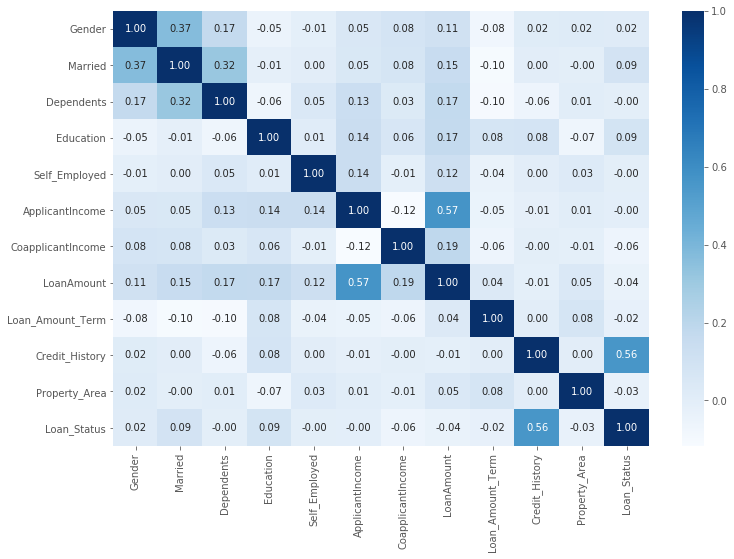

In [64]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(),annot=True,fmt='.2f',cmap="Blues")
plt.show()

# Missing_Value & Outliers


In [65]:
#using original dataset of train and test for imputing missing values
train_original.loc[(train_original['Gender'].isnull()) & (train_original['Married']== 'Yes'),'Gender']= 'Male'
train_original.loc[(train_original['Gender'].isnull()) & (train_original['Married']== 'No'),'Gender']= 'Female'

In [66]:
train_original["Gender"].isnull().sum()

0

In [67]:
test_data.loc[(test_data['Gender'].isnull()) & (test_data['Married'] == 'Yes'),'Gender']= 'Male'
test_data.loc[(test_data['Gender'].isnull()) & (test_data['Married']== 'No'),'Gender']= 'Female'

In [68]:
train_original.loc[(train_original["Married"].isnull()) & (train_original["Gender"]=="Male"),"Married"]="Yes"
train_original.loc[(train_original["Married"].isnull()) & (train_original["Gender"]=="Female"),"Married"]="No"

In [69]:
train_original['Married'].isnull().sum()

0

### Dependents

In [70]:
train_original["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [71]:
test_data["Dependents"].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [72]:
train_original['Dependents']= train_original['Dependents'].fillna('0')
test_data['Dependents']= test_data['Dependents'].fillna('0')

In [73]:
test_data["Dependents"].isna().sum()

0

In [74]:

train_original['Dependents']= train_original['Dependents'].map({"0":0,"1":1,"2":2,"3+":4})
test_data['Dependents']= test_data['Dependents'].map({"0":0,"1":1,"2":2,"3+":4})

In [75]:
#label encoder of Dependents
from sklearn.preprocessing import LabelEncoder

In [76]:
le = LabelEncoder()
train_original["Dependents"]=le.fit_transform(train_original["Dependents"])
test_data["Dependents"]=le.fit_transform(test_data["Dependents"])

### Self_employed

In [77]:
#missing values of self_employed variable
train_original["Self_Employed"].isna().sum()

32

In [78]:
train_original.loc[(train_original["Self_Employed"].isnull()) & (train_original['Education'] == "Graduate"),'Self_Employed'] ="No"
train_original.loc[(train_original["Self_Employed"].isnull()) & (train_original['Education'] == "Not Graduate"),'Self_Employed'] ="Yes"

In [79]:
train_original["Self_Employed"].isna().sum()

0

In [80]:
test_data.loc[(test_data["Self_Employed"].isnull()) & (test_data["Education"]=="Graduate"),"Self_Employed"]="No"
test_data.loc[(test_data["Self_Employed"].isnull()) & (test_data["Education"]=="Not Graduate"),"Self_Employed"]="Yes"

In [81]:
train_original.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [82]:
test_data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [83]:
train_original.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [84]:
train_original.iloc[:,8:11].head()

,LoanAmount,Loan_Amount_Term,Credit_History
0,NaN,360.0,1.0
1,128.0,360.0,1.0
2,66.0,360.0,1.0
3,120.0,360.0,1.0
4,141.0,360.0,1.0


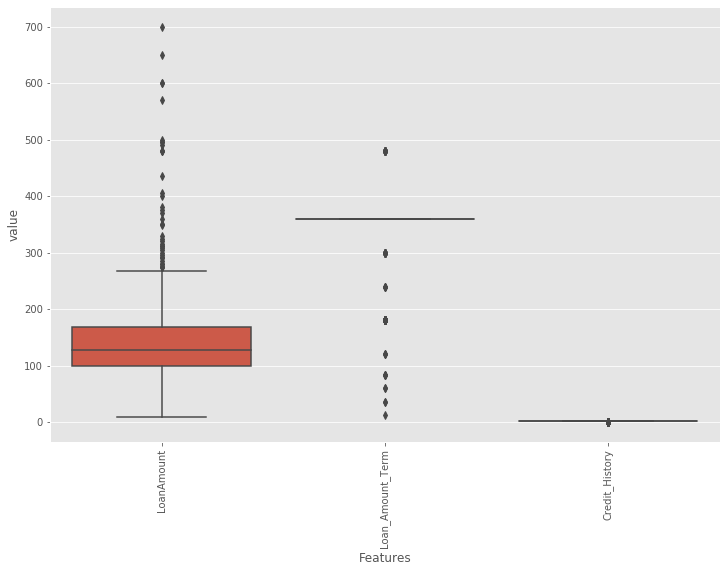

In [85]:
#finding outliers of LoanAmount , Loan_Amount_Term and Credit_History
data1=pd.concat([train_original.Loan_Status,train_original.iloc[:,8:11]],axis=1)
data1=pd.melt(data1,id_vars="Loan_Status",var_name="Features",value_name="value")
plt.figure(figsize=(12,8))
sns.boxplot(x="Features",y="value",data=data1)
plt.xticks(rotation=90)
plt.show()

In [86]:
#selecting values below 450 to remove the outliers
train_original=train_original[train_original['LoanAmount']<450]

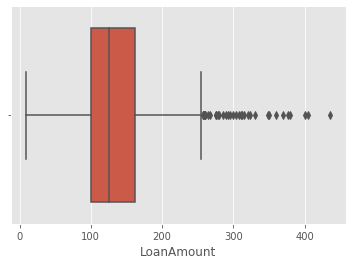

In [87]:
sns.boxplot(train_original["LoanAmount"])

In [88]:
train_original.shape

(580, 13)

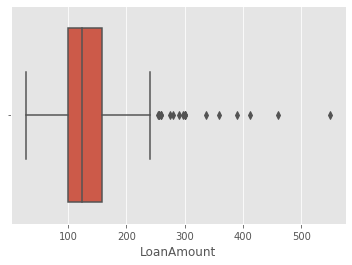

In [89]:
#test data outliers
sns.boxplot(test_data["LoanAmount"])

In [90]:
test_data=test_data[test_data["LoanAmount"]<450]

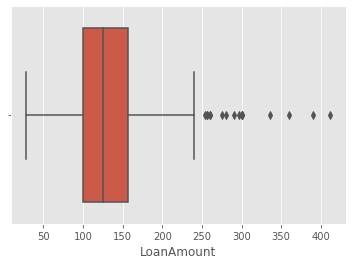

In [91]:
sns.boxplot(test_data["LoanAmount"])

In [92]:
test_data.shape

(360, 12)

In [93]:
train_original.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       47
Property_Area         0
Loan_Status           0
dtype: int64

In [94]:
test_data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       28
Property_Area         0
dtype: int64

In [95]:
#missing values of Loan_Amount_Term of test and train dataset
train_original["Loan_Amount_Term"].fillna(train_original["Loan_Amount_Term"].median(),inplace=True)
test_data["Loan_Amount_Term"].fillna(test_data["Loan_Amount_Term"].median(),inplace=True)

In [96]:
train_original["Credit_History"].fillna(train_original["Credit_History"].mode()[0],inplace=True)
test_data["Credit_History"].fillna(test_data["Credit_History"].mode()[0],inplace=True)

In [97]:
print(train_original.isna().sum())
print("-"*30)
print(test_data.isna().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
------------------------------
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


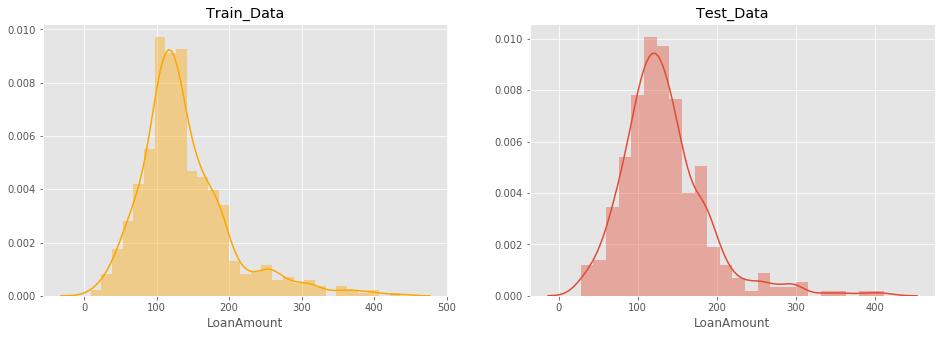

In [98]:
#checking skewness of numeric variables in datasets
plt.figure(figsize=(16,5))
bins=20
plt.subplot(121)
sns.distplot(train_original["LoanAmount"],color="orange").set_title("Train_Data")
plt.subplot(122)
sns.distplot(test_data["LoanAmount"]).set_title("Test_Data")
plt.show()

In [99]:
#removing skewness of datasets
train_original["LoanAmount"]=np.log(train_original["LoanAmount"])
test_data["LoanAmount"]=np.log(test_data["LoanAmount"])

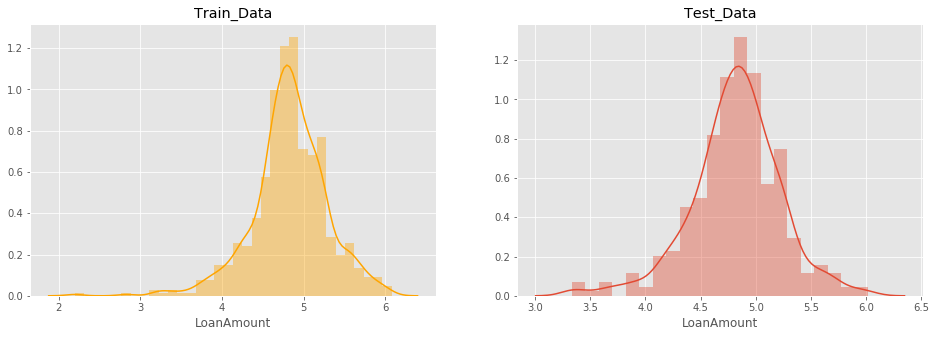

In [100]:
plt.figure(figsize=(16,5))
plt.subplot(121)
ax=bins=20
sns.distplot(train_original["LoanAmount"],color="orange").set_title("Train_Data")
plt.subplot(122)
sns.distplot(test_data["LoanAmount"]).set_title("Test_Data")
plt.show()

### Adding Applicantincome and Coapplicant

In [101]:
train_original["Total_income"]=train_original["ApplicantIncome"]+train_original["CoapplicantIncome"]
test_data["Total_income"]=test_data["ApplicantIncome"]+test_data["CoapplicantIncome"]

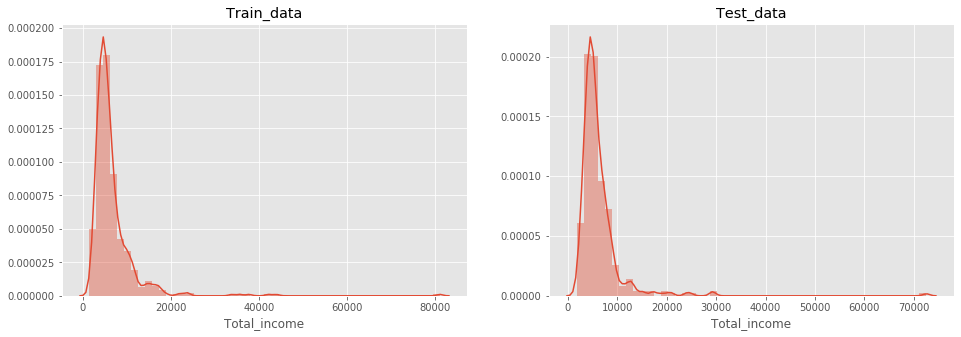

In [102]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(train_original["Total_income"]).set_title("Train_data")
plt.subplot(122)
sns.distplot(test_data["Total_income"]).set_title("Test_data")
plt.show()

In [103]:
#removing skewness from total_income
train_original["Total_income"]=np.log(train_original["Total_income"])
test_data["Total_income"]=np.log(test_data["Total_income"])

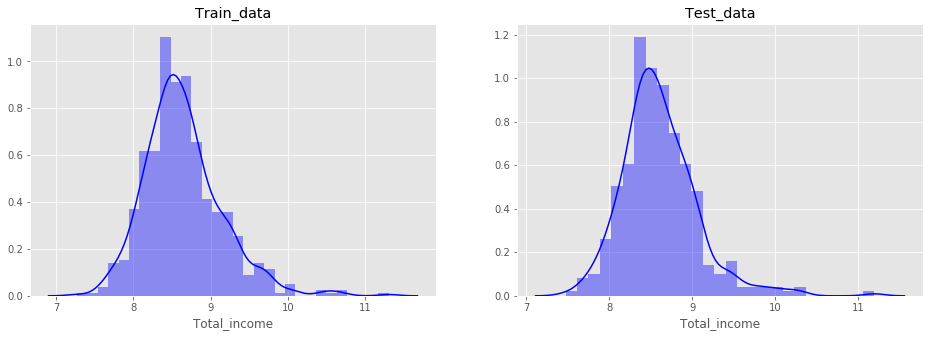

In [104]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(train_original["Total_income"],color="Blue").set_title("Train_data")
plt.subplot(122)
sns.distplot(test_data["Total_income"],color="Blue").set_title("Test_data")
plt.show()

In [105]:
#selection of variables
train_original=train_original.drop(["ApplicantIncome","CoapplicantIncome"],axis=1)
test_data=test_data.drop(["ApplicantIncome","CoapplicantIncome"],axis=1)

In [106]:
print(train_original.isna().sum())
print("-"*30)
print(test_data.isna().sum())

Loan_ID             0
Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Total_income        0
dtype: int64
------------------------------
Loan_ID             0
Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Total_income        0
dtype: int64


### All the missing values have been filled in both the dataset 

In [107]:
#dropping loan_id
train_df=train_original.drop("Loan_ID",axis=1)

In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
LE=LabelEncoder()
train_original["Loan_Status"]=LE.fit_transform(train_original["Loan_Status"])

In [110]:
train_df=pd.get_dummies(train_df.drop("Loan_Status",axis=1),drop_first=True)

In [111]:
test_df=test_data.drop("Loan_ID",axis=1)

In [112]:
test_df=pd.get_dummies(test_df,drop_first=True)

In [113]:
print(train_df.shape)
print(test_df.shape)

(580, 11)
(360, 11)


###  X and Y

In [114]:
X_train=train_df
y_train=train_original["Loan_Status"]

In [115]:
X_test=test_df

In [116]:
print("Train_data",X_train.shape,y_train.shape)
print("Test_data",X_test.shape)

Train_data (580, 11) (580,)
Test_data (360, 11)


In [117]:
X_train.head()

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Total_income,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
1,1,4.852030,360.0,1.0,8.714568,1,1,0,0,0,0
2,0,4.189655,360.0,1.0,8.006368,1,1,0,1,0,1
3,0,4.787492,360.0,1.0,8.505323,1,1,1,0,0,1
4,0,4.948760,360.0,1.0,8.699515,1,0,0,0,0,1
5,2,5.587249,360.0,1.0,9.170872,1,1,0,1,0,1


In [118]:
X_test.head()

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Total_income,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0,4.700480,360.0,1.0,8.651724,1,1,0,0,0,1
1,1,4.836282,360.0,1.0,8.428581,1,1,0,0,0,1
2,2,5.337538,360.0,1.0,8.824678,1,1,0,0,0,1
3,2,4.605170,360.0,1.0,8.494129,1,1,0,0,0,1
4,0,4.356709,360.0,1.0,8.094378,1,0,1,0,0,1


# Model Selection

In [119]:
#importing libraries
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import cross_val_score
#importing classifier modules
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

## 1. Logistic Regression

In [120]:
import warnings
warnings.filterwarnings("ignore")

In [121]:
clf = LogisticRegression()
scoring="accuracy"
score=cross_val_score(clf,X_train,y_train,n_jobs=1,scoring=scoring)
print(score)

[0.81034483 0.78448276 0.79310345 0.87068966 0.82758621]


In [122]:
logistic=round(np.mean(score)*100,2)
print(logistic)

81.72


## 2. K-Nearest Neighbour

In [123]:
from sklearn.model_selection import KFold
k_fold =KFold(n_splits=10,shuffle=True,random_state=0)

In [124]:
clf=KNeighborsClassifier(n_neighbors=13)
scoring="accuracy"
score=cross_val_score(clf,X_train,y_train,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.81034483 0.65517241 0.72413793 0.77586207 0.75862069 0.79310345
 0.70689655 0.74137931 0.74137931 0.74137931]


In [125]:
knn=round(np.mean(score)*100,2)
print(knn)

74.48


## 3. Random Forest Classifier

In [126]:
clf=RandomForestClassifier()
scoring="accuracy"
score=cross_val_score(clf,X_train,y_train,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.84482759 0.77586207 0.81034483 0.79310345 0.79310345 0.79310345
 0.77586207 0.77586207 0.81034483 0.79310345]


In [127]:
Random_Forest=round(np.mean(score)*100,2)
print(Random_Forest)

79.66



## 4. Decision Tree

In [128]:
clf=DecisionTreeClassifier()
scoring="accuracy"
score=cross_val_score(clf,X_train,y_train,cv=k_fold,scoring=scoring)
print(score)

[0.86206897 0.62068966 0.70689655 0.72413793 0.75862069 0.79310345
 0.74137931 0.65517241 0.72413793 0.68965517]


In [129]:
Decision_Tree=round(np.mean(score)*100,2)
print(Decision_Tree)

72.76


## 5. Support Vector Classifier

In [130]:
clf=SVC()
scoring="accuracy"
score=cross_val_score(clf,X_train,y_train,cv=k_fold,scoring=scoring)
print(score)

[0.72413793 0.5862069  0.67241379 0.74137931 0.70689655 0.72413793
 0.68965517 0.72413793 0.68965517 0.68965517]


In [131]:
SVClassifier=round(np.mean(score)*100,2)
print(SVClassifier)

69.48


## 6. Naive Bayes

In [132]:
clf=GaussianNB()
scoring="accuracy"
score=cross_val_score(clf,X_train,y_train,cv=k_fold,scoring=scoring)
print(score)

[0.87931034 0.77586207 0.75862069 0.82758621 0.84482759 0.81034483
 0.84482759 0.79310345 0.82758621 0.82758621]


In [133]:
Naive_bayes=round(np.mean(score)*100,2)
print(Naive_bayes)

81.9


# Accurcy_Score comparison

In [134]:
col=['Naive_bayes','knn','SVClassifier','logistic','Random_Forest','Decision_Tree']

In [135]:
scr=Naive_bayes,knn,SVClassifier,logistic,Random_Forest,Decision_Tree

In [145]:
scores=pd.DataFrame({"Classifier":col,"Accuracy":scr})

In [146]:
scores.style.background_gradient(cmap='Blues')

,Classifier,Accuracy
0,Naive_bayes,81.900000
1,knn,74.480000
2,SVClassifier,69.480000
3,logistic,81.720000
4,Random_Forest,79.660000
5,Decision_Tree,72.760000
